# Classifying Movie Genres Based on the Title and Plot

Cameron Wonchoba

Andrew Leo

Tou Yang

# Overview

Movies are put into categories called `genres`. These genres describe the expectations that a person should have when they watch the movie.

We are given a data set that maps each movie title and their plot to the genre they are in. Using Natural Language Processing, we will identify what genre the movie is based on the title and plot. 

Developing a tool that can accurately identify these genres based on the genre and plot may help movie creators effectively write a movie title and generic plot. Once they create their title and plot, they could pass it into this model and verify that it conveys the message that they intend.

This is a multiclass classification problem that will utilize Natural Language Processing.

## What is Natural Language Processing?

Natural Language processing allows computers to analyze and understand human written language. Ultimately, we want to be able to parse the natural language in a way that is valuable. 

There are two parts of a language that the computer needs to be able to understand:

### Syntax
Syntax describes the way we arrange words to make a sentence that is grammatically correct. Syntax is important to help the computer learn the structure of our language. It helps to learn if each sentence is grammatically correct or not. 

### Semantics
Semantics describes the meaning behind each word, sentence or phrase. Semantics are important to help the computer understand the meaning behind indiviudal words and combination of words. This becomes difficult when words have more than one meaning. For example:

1. I crashed my car.
2. I crashed on my couch.

Here, the word "crashed" have different meanings. 

In the first example, "crashed" means destroyed or ruined.

In the second example, "crashed" means sleep.

Helping a computer understand these subtle differences in meaning can be difficult to do.

## Techniques/Libraries to Used in NLP
Below is a list of libraries and tools that may help us in the project.

1. Natural Language Toolkit (NLTK)
    * https://www.nltk.org/
    * Slow and steep learning curve 
2. TextBlob
    * https://textblob.readthedocs.io/en/dev/
    * Easy to learn (great for beginners!), but it is slow
3. CoreNLP
    * https://stanfordnlp.github.io/CoreNLP/
    * Really fast and can be integrated with NLTK
4. Gensim
    * https://github.com/RaRe-Technologies/gensim
    * Specializes in semantic recognition
5. spaCy
    * https://spacy.io/
    * Really fast! Only supports 7 languages (Python is one of them, so we're good).
6. polyglot
    * https://polyglot.readthedocs.io/en/latest/index.html
    * Similar performance to spaCy but supports more languages.
7. scikit–learn
    * https://scikit-learn.org/stable/
    * Great documentation and familiar. Does not use Neural Networks for processing, so it isn't as good.
8. Pattern
    * https://www.clips.uantwerpen.be/pages/pattern
    * Good for webmining, but doesn't include enough NLP tasks


Sources:

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://sunscrapers.com/blog/8-best-python-natural-language-processing-nlp-libraries/

# Topic Modeling
Here we are going to do a form of topic modeling. Topic Modeling is trying to understand the topic of a piece of text. In our case, the topic can be defined as the genre. We will try to figure out the genre of the movie (topic).

# Data

The data set that we are using can be found here: https://github.com/davidsbatista/text-classification/blob/master/movies_genres.csv.bz2

This data set includes the title, plot and genre of 117,352 movies. The genres that are included in this data set are:
* Action
* Adult 
* Adventure
* Animation
* Biography
* Comedy
* Crime
* Documentary
* Drama
* Family
* Fantasy
* Game-Show
* History
* Horror
* Lifestyle
* Music
* Musical
* Mystery
* News
* Reality-TV
* Romance
* Sci-Fi
* Short
* Sport
* Talk-Show
* Thriller
* War
* Western

> NOTE: Each movie is mapped to only one genre. In practice, it may be the case that movies are mapped to more than one genre.

In [1]:
import pandas as pd
import numpy as np
import time
pd.set_option('display.max_columns', None)

In [2]:
path_to_data = "../data/movies_genres.csv"
movies = pd.read_csv(path_to_data, delimiter='\t')

In [3]:
movies.head(3)

,title,plot,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Game-Show,History,Horror,Lifestyle,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,"""#7DaysLater"" (2013)",#7dayslater is an interactive comedy series f...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""#BlackLove"" (2015) {Crash the Party (#1.9)}","With just one week left in the workshops, the...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,"""#BlackLove"" (2015) {Making Lemonade Out of Le...",All of the women start making strides towards...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Dropping Rows
Some movies and TV shows are mapped to more than one genre. This substantially increases the complexity of our problem, so we decided to drop them.

In the future we would want to doing some analysis with all of the rows. We may want to get a probability of the plot belonging to each genre, and we could grab the top 'x' genres.

In [4]:
def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(float).sum(axis=1)
    return(frame)

sum_frame_by_column(movies, 'genre_sum', ['Action','Adult','Adventure','Animation','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy','Game-Show','History','Horror','Music','Musical','Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Talk-Show','Thriller','War','Western'])

print("Movie Count prior to dropping rows: ", movies.shape[0])

movies = movies[movies.genre_sum == 1]
    
print("Movie Count after dropping rows: ", movies.shape[0])

Movie Count prior to dropping rows:  117352
Movie Count after dropping rows:  47827


# Convert one-hot-encoded to single row

The target variables need to be condensed down to a single row.

In [5]:
def get_genre(row):
    for c in movies.columns:
        if row[c] == 1:
            return c
        
movies['Genre'] = movies.apply(get_genre, axis=1)

movies['Genre'].head()

0        Comedy
1    Reality-TV
2    Reality-TV
3    Reality-TV
4    Reality-TV
Name: Genre, dtype: object

# Exploratory Data Analysis

In [6]:
import nltk
nltk.download('all', quiet=True)

True

## Shape
How many observations and columns do we have?

In [7]:
print(f"There are {movies.shape[0]} rows and {movies.shape[1]} columns.")

There are 47827 rows and 32 columns.


## Which movies do we have more observations for?

Comedy         10925
Reality-TV      8284
Drama           7467
Documentary     6090
Talk-Show       2777
Western         1950
Animation       1663
Family          1611
News            1312
Music            743
Adventure        703
Sport            693
Crime            638
Romance          524
Game-Show        419
Sci-Fi           377
History          293
Horror           262
Mystery          240
Action           201
Thriller         178
Biography        164
Fantasy          128
Short             70
Adult             52
Musical           36
War               27
Name: Genre, dtype: int64


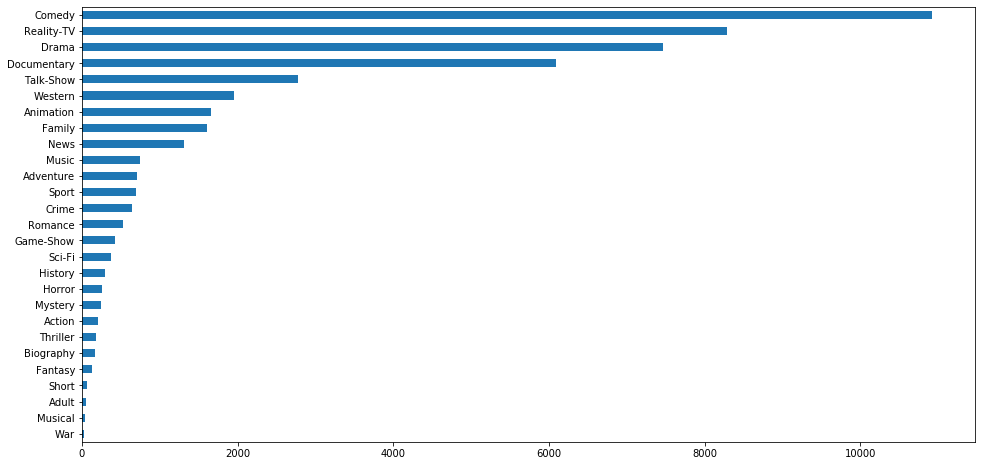

In [8]:
print(movies['Genre'].value_counts())

movies['Genre'].value_counts().sort_values().plot(kind = 'barh', figsize=(16,8))

The most common movie genres are:
* Comedy
* Reality-TV
* Drama
* Documentary

The least common movie genres are:
* War
* Musical
* Adult
* Short

There are 0 "lifestyle" movies. We can drop this column.

In [9]:
movies = movies.drop(columns=['Lifestyle'], axis=1)

Are there any weird values in the table?

In [10]:
movies.isnull().any()

title          False
plot           False
Action         False
Adult          False
Adventure      False
Animation      False
Biography      False
Comedy         False
Crime          False
Documentary    False
Drama          False
Family         False
Fantasy        False
Game-Show      False
History        False
Horror         False
Music          False
Musical        False
Mystery        False
News           False
Reality-TV     False
Romance        False
Sci-Fi         False
Short          False
Sport          False
Talk-Show      False
Thriller       False
War            False
Western        False
genre_sum      False
Genre          False
dtype: bool

All values exist

## Lets look at the actual titles and plots

In [12]:
movies['title']

0                                      "#7DaysLater" (2013)
1              "#BlackLove" (2015) {Crash the Party (#1.9)}
2         "#BlackLove" (2015) {Making Lemonade Out of Le...
3             "#BlackLove" (2015) {Miss Independent (#1.5)}
4            "#BlackLove" (2015) {Sealing the Deal (#1.10)}
                                ...                        
117343            "Öyle Bir Geçer Zaman ki" (2010) {(#1.1)}
117344           "Öyle Bir Geçer Zaman ki" (2010) {(#1.14)}
117345           "Öyle Bir Geçer Zaman ki" (2010) {(#1.16)}
117346            "Öyle Bir Geçer Zaman ki" (2010) {(#1.6)}
117351         "Über Österreich - Juwele des Landes" (2016)
Name: title, Length: 47827, dtype: object

Movie titles are surrounded by quotes. We will extract them using the following regular expression:

`"([^"]*)"`

In english, this regular expression can be read as:

Match everything that starts with quotes, contains anything that isn't a quote, followed by zero or more things, followed by a quote. 

In [13]:
# Lets extract the title name.
movies['Extracted Title'] = movies['title'].str.extract(r'"([^"]*)"')

# Now remove the first occurence of the '#' from the string.
movies['Extracted Title'] = movies['Extracted Title'].str.replace('#',"",1)

The year the title was made is surrounded by paranthesis. We will extract them using the following regular expression:

`\((.*?)\)`

In [14]:
movies['year'] = movies['title'].str.extract(r'\((.*?)\)')

It turns out that we also have tv shows in this data set. These can be discovered if there is some text surround by curly braces ({}). We can extract these by using the folloiwng regular expression:

`\{(.*?)\}`

We will then get rid of the episode number (these are defined by paranthesis).

`\(.*\)`

In [15]:
movies['Episode Info'] = movies['title'].str.extract(r'\{(.*?)\}')
movies['Episode Info'] = movies['Episode Info'].str.replace(r"\(.*\)","")

# Detecting languages
We should look at what languages we have. We should only deal with the english language for now.

We will detect the language of the plot. We choose the plot because it has the most words, and it is supposed to be grammatically correct. We can assume that they are grammatically correct as they are uploaded onto IMbD.

https://pypi.org/project/langdetect/

In [16]:
from langdetect import detect

# Apply the detect function for every row on the "plot" column.
# NOTE: This takes a while to complete.
movies['Language'] = movies.apply(lambda row : detect(row['plot']), axis=1)

In [17]:
movies['Language'].value_counts()

en    47790
nl       12
de       10
da        6
it        3
no        1
es        1
sl        1
pt        1
fr        1
hu        1
Name: Language, dtype: int64

Here is an example of a `Dutch` plot that was found.

In [23]:
movies[movies['Language'] == 'nl']['plot'][16152]

' In het CMC komt Cleo de Waard zich voorstellen als de nieuwe directeur van het ziekenhuis. Niet iedereen is blij met haar komst. Ondertussen wordt er hard doorgewerkt door de artsen en verpleegkundigen. Zij moeten het hoofd koel houden in moeilijke situaties en alles doen voor hun patiënten.'

There are some non-english movies in this set. Lets drop the rows that aren't english.

In [24]:
# Keep rows that are in english.
movies = movies[movies['Language'] == 'en']

# Reset the index as they are now messed up (due to the removal of rows)
movies = movies.reset_index()

movies['Language'].value_counts()

en    47790
Name: Language, dtype: int64

# Tokenization
Now we need to tokenize all of the words.

We are opting for the `TweetTokenizer` instead of `word_tokenize` because the word_tokenizer doesn't seem to handle apostophe's very well. For example:

Give the word `week's`

* word_tokenizer => ['week',"'s"]

* TweetTokenizer => ["week's"]

In [25]:
from nltk.tokenize import TweetTokenizer

start = time.time()

tokenizer = TweetTokenizer()

# For every plot, split it into its respective tokens.
movies["plot_tokens"] =  movies.apply(lambda row : tokenizer.tokenize(row['plot']), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  16.33222007751465


In [26]:
movies['plot'][0]

" #7dayslater is an interactive comedy series featuring an ensemble cast of YouTube celebrities. Each week the audience writes the brief via social media for an all-new episode featuring a well-known guest-star. Seven days later that week's episode premieres on TV and across multiple platforms."

In [31]:
# Joining each token
"--".join(movies['plot_tokens'][0])

"#7dayslater--is--an--interactive--comedy--series--featuring--an--ensemble--cast--of--YouTube--celebrities--.--Each--week--the--audience--writes--the--brief--via--social--media--for--an--all-new--episode--featuring--a--well-known--guest-star--.--Seven--days--later--that--week's--episode--premieres--on--TV--and--across--multiple--platforms--."

We now have our tokens for each row.

Lets figure out how many Tokens we have...

In [33]:
# I'm also curious as to how many total tokens we have
plot_tokens_lst = movies["plot_tokens"].tolist()

token_count = 0
for sentence in plot_tokens_lst:
    token_count += len(sentence)

print("Total Number of Tokens: ", token_count)

Total Number of Tokens:  4812327


Lets extract these tokens into a list, and find the 20 most common tokens.

In [34]:
from nltk.probability import FreqDist
fdist = FreqDist()

for sentence in plot_tokens_lst:
    for word in sentence:
        fdist[word.lower()]+=1
        
fdist.most_common(20)

[('the', 231559),
 ('.', 211973),
 (',', 193979),
 ('to', 144266),
 ('and', 136731),
 ('a', 126554),
 ('of', 89134),
 ('in', 69652),
 ('is', 60478),
 ('with', 47357),
 ('his', 42869),
 ('her', 41614),
 ('for', 40321),
 ('he', 35633),
 ('that', 34485),
 ('on', 33371),
 ('"', 31357),
 ('as', 26428),
 ('but', 24149),
 ('she', 23351)]

Unique Number of tokens?

In [35]:
# How many unique tokens are there?
print(f"There are {len(fdist)} unique tokens.")

There are 111251 unique tokens.


These tokens seem uninformative... Lets clean up the tokens a bit by removing puncutation and stop noises.

# Removing Noise
`Stemming` works by cutting off the ends of the words. However, this doesn't always work. Sometimes it will convert a word into a word that is not technically it's root. 

`Lemmatization` will reduces each word to it's "true" root.

However, we also want to remove the noise (ie. stopwords). To do this, we will use the function that was seen in the In Class 11 exercise.

This function prunes out all words that is a `punctuation` or a `stop_word`.

Originally from: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

In [36]:
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
from nltk.tag import pos_tag

def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []

    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        lem_token = lemmatizer.lemmatize(token, pos)
        
        if len(lem_token) > 0 and lem_token not in string.punctuation and lem_token.lower() not in stop_words:
            cleaned_tokens.append(lem_token.lower())
            
    return cleaned_tokens

In [37]:
# NOTE: This code block takes about 10 minutes to run.
from nltk.corpus import stopwords

start = time.time()

movies['plot_tokens_cleaned'] = movies.apply(lambda row : remove_noise(row['plot_tokens'], stopwords.words('english')), axis=1)

print("Time Elapsed: ", time.time() - start)

Time Elapsed:  391.8748595714569


## Exploring Tokens after pruning

In [38]:
from nltk.probability import FreqDist
fdist = FreqDist()

for sentence in movies['plot_tokens_cleaned'].tolist():
    for word in sentence:
        fdist[word.lower()]+=1
        
fdist.most_common(20)

[('get', 15266),
 ('find', 11947),
 ('make', 11755),
 ('new', 11461),
 ('take', 11393),
 ('go', 11272),
 ('one', 10195),
 ('show', 8427),
 ('life', 7727),
 ('tell', 7194),
 ('want', 7113),
 ('help', 7105),
 ('try', 6922),
 ('come', 6891),
 ('time', 6822),
 ('qv', 6777),
 ('work', 6559),
 ('family', 6527),
 ('back', 6203),
 ('two', 6133)]

In [41]:
flat_list = [item for sublist in movies['plot_tokens_cleaned'].tolist() for item in sublist]
print(f"There are {len(flat_list)} tokens.")
print(f"There are {len(set(flat_list))} unique tokens.")

There are 2450128 tokens.
There are 103563 unique tokens.


# Exploring Word Density
We can look at the most common words within each genre.

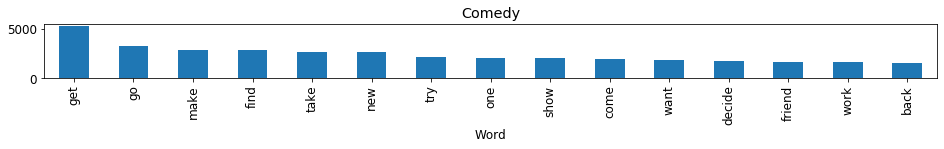

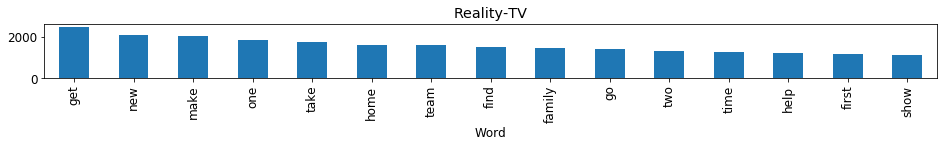

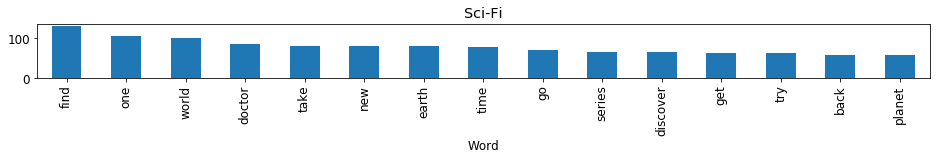

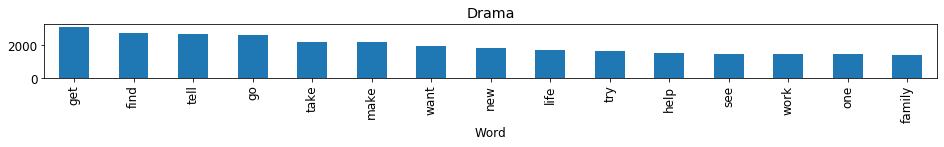

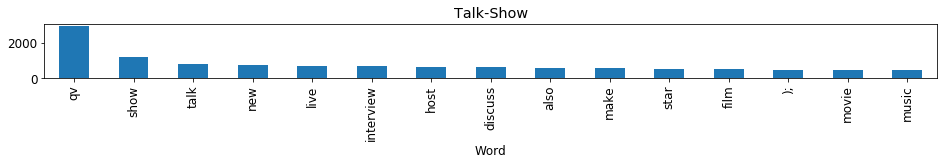

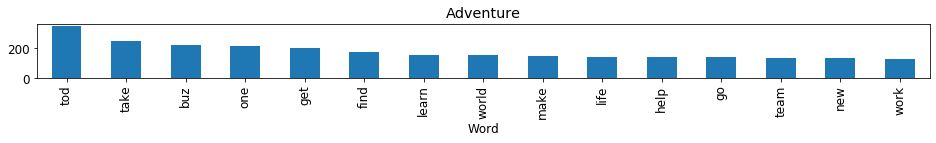

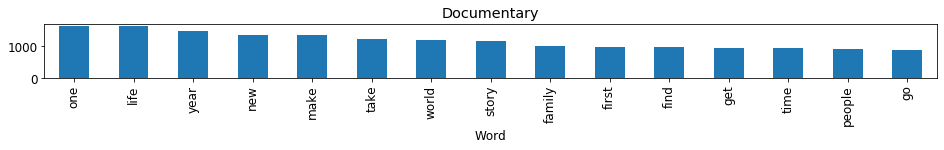

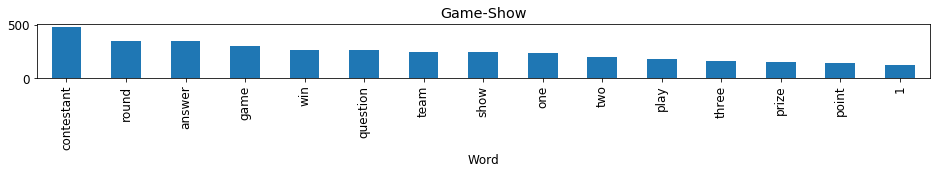

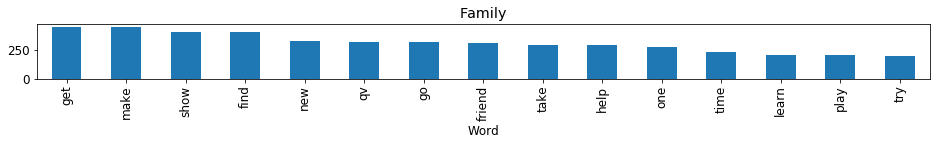

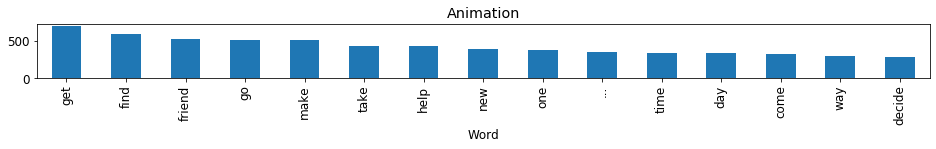

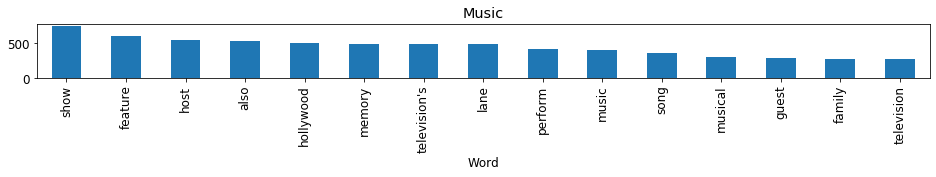

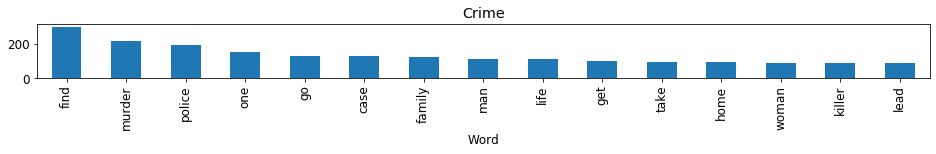

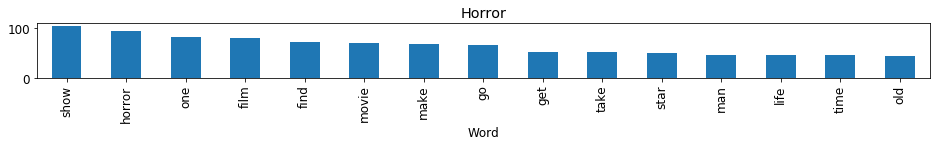

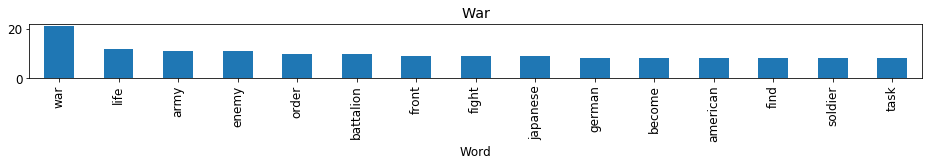

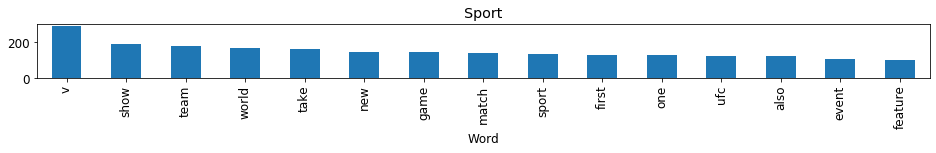

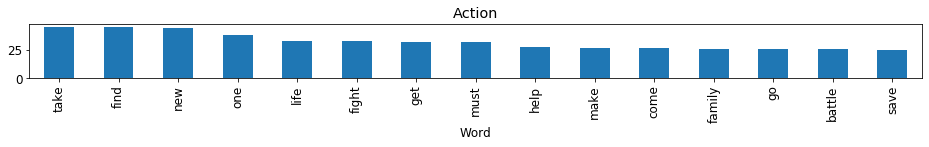

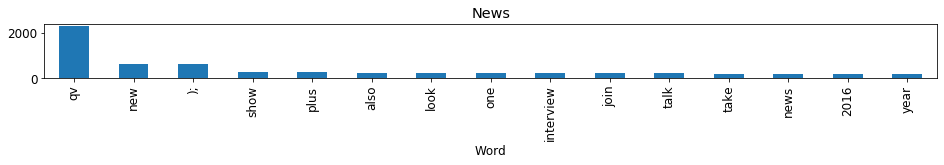

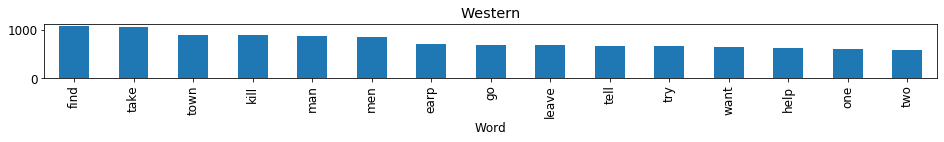

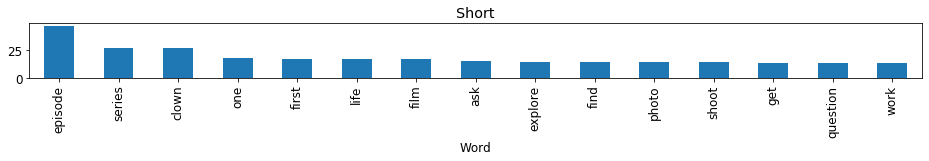

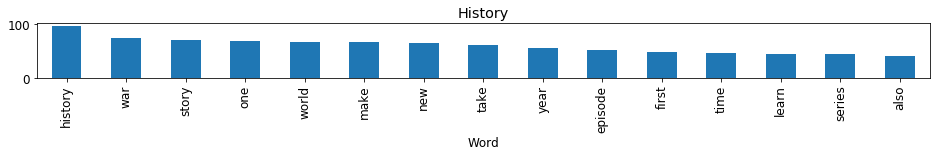

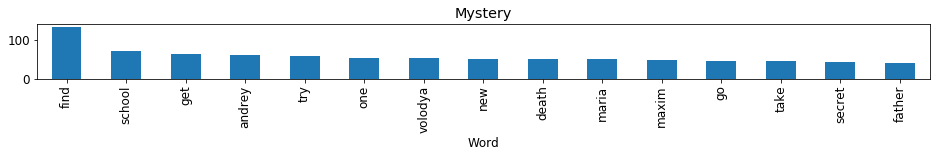

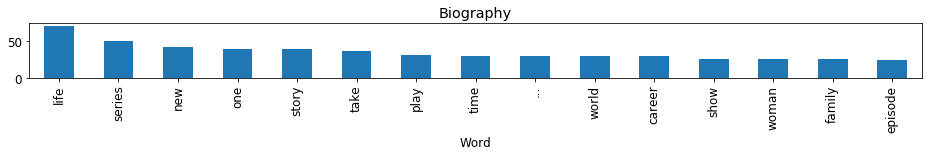

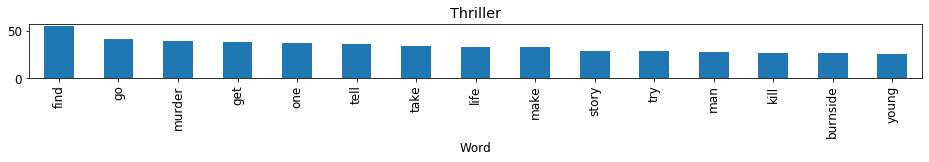

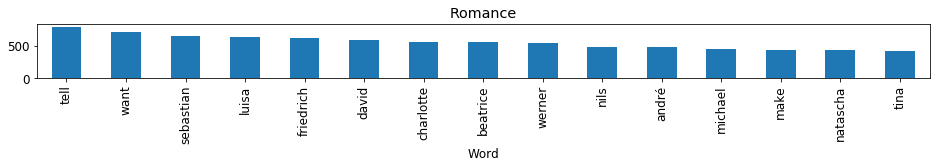

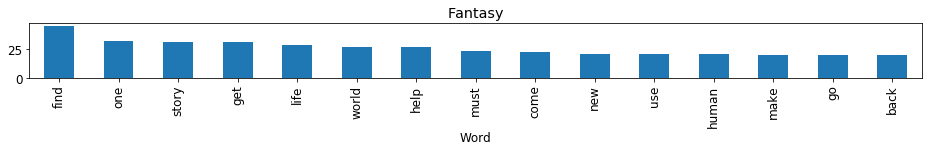

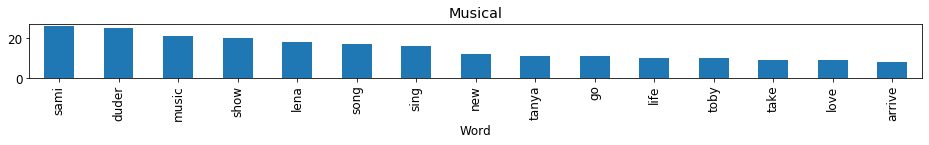

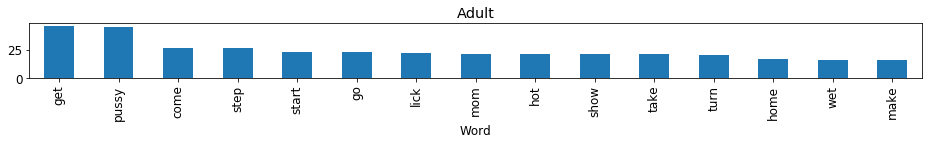

In [48]:
from nltk.probability import FreqDist
import matplotlib
from matplotlib import pyplot as plt

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

# Iterate through each movie and get the most common words. Maybe plot them?
for movie in movies['Genre'].unique():
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    
    matplotlib.rcParams.update({'font.size': 12})
    
    df = pd.DataFrame(fdist.most_common(15),columns=['Word','Count'])
    df.plot(x='Word', y='Count', kind='bar', legend=False, figsize=(16,1))
    
    plt.title(movie)
    plt.show()

We now have a count of the most common words in each genre.

# Sentiment Analysis

We will now look at how positive or negative each plot is.

Using textblob, we are calculating the sentiment polarity of each plot, each of which will lie in the range of [1,-1] where 1 means positive sentiment and -1 means a negative sentiment.

In [49]:
#pip install -U textblob
from textblob import TextBlob

movies['polarity'] = movies['plot'].map(lambda text: TextBlob(text).sentiment.polarity)
movies['plot_len'] = movies['plot'].astype(str).apply(len)

print('5 random Plots with the highest positive sentiment polarity:\n')
pl = movies.loc[movies.polarity == 1, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')
    #Only this one takes about 5-15 mins depending on computer

5 random Plots with the highest positive sentiment polarity:

 March 29, 1966, Muhammad Ali--the self-proclaimed greatest boxer of all time--clashed with working-class Canadian champ George Chuvalo in a heavyweight title marathon that lasted all 15 rounds. Ali won by unanimous decision but declared Chuvalo "the toughest guy I ever fought." 

 The chefs need to use coupons when preparing their best grilled dish on a budget; they must incorporate peanut butter and jelly in their decadent breakfast recipes. Also: Sunday supper is the theme of a "One Ingredient Per Aisle" challenge. 

 Brooke and Kevin put their hacking skills to the test as they find out which hacks work best for removing pet hair, grilling without charcoal, and opening a wine bottle without a bottle opener. Plus, they'll uncover the best pool party hacks, and craft a hack-filled defense against the rugged outdoorsman. 

 An insomniac Rab gets no help from an insomniac doctor and when Andra collapses with a heart attack, 

In [50]:
print('5 random Plots with the most neutral sentiment polarity(0):\n')
pl = movies.loc[movies.polarity == 0, ['plot']].sample(5).values
for p in pl:
    print(p[0],'\n')

5 random Plots with the most neutral sentiment polarity(0):

 Memory foam goes up against a double drum roller. A dog trained to sniff out peanuts is pitted against a super-cleaning pressure washer. A blender whose blades spin at 300 mph goes up against a sledgehammer out prove that it's indestructible. 

 In this episode of Barry'd Treasure: Barry and Kenny go on an Evel Knievel leather quest that takes them all over Los Angeles. Along the way they record a "banging" song, see their cartoon counterparts, and Barry breaks one of Evel's records. 

 Typhoon, a navy hovercraft, must pick up a 60 ton tank from the middle of the Atlantic Ocean, an excavation crew in South Africa battles landslides in order to mine platinum ore, and an underground drill rig races against the clock to save Stockholm. 

 Coe journey into his family history begins in Cheshire, where his family seat at Hyde Hall once stood. He follows a trail to Jamaica and discovers a life on the plantation. Which he uncover il

In [51]:
print('2 random Plots with the most negative polarity: \n')
pl = movies.loc[movies.polarity == -1, ['plot']].sample(2).values
for p in pl:
    print(pl[0],'\n')

2 random Plots with the most negative polarity: 

[' Samuel Jackson, Juliette Lewis and Eli Roth reflect on the shocking, provocative career of Quentin Tarantino, from his underdog beginnings and mainstream breakthrough to blockbuster revenge epics like Inglourious Basterds and Django Unchained.'] 

[' Samuel Jackson, Juliette Lewis and Eli Roth reflect on the shocking, provocative career of Quentin Tarantino, from his underdog beginnings and mainstream breakthrough to blockbuster revenge epics like Inglourious Basterds and Django Unchained.'] 



# Histogram of polarity

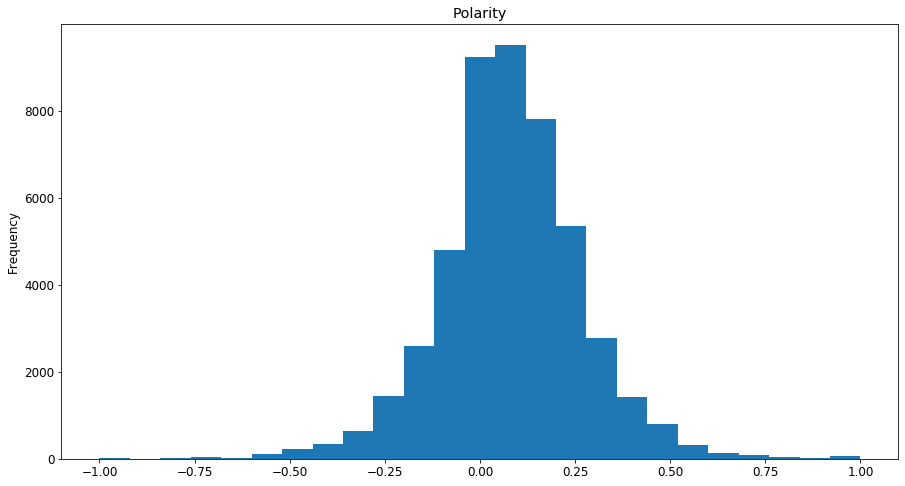

In [52]:
movies['polarity'].plot(
    kind='hist',
    bins = 25,
    legend=False, 
    figsize=(15,8))

plt.title('Polarity')

plt.show()

Vast majority of the sentiment polarity scores are hovering between -0.25 and 0.25, meaning that most of the plots in the database are more neutral sided. It is safe to say that there are more positive plots and negative plots base on the graph above. As you can see the more we more towards 1 or -1 the less amount of plots we get that have a ploarity score of 1 and -1.

Get the average sentiment for each genre, and plot it. This will show us if different Genres tend to display different sentiments.

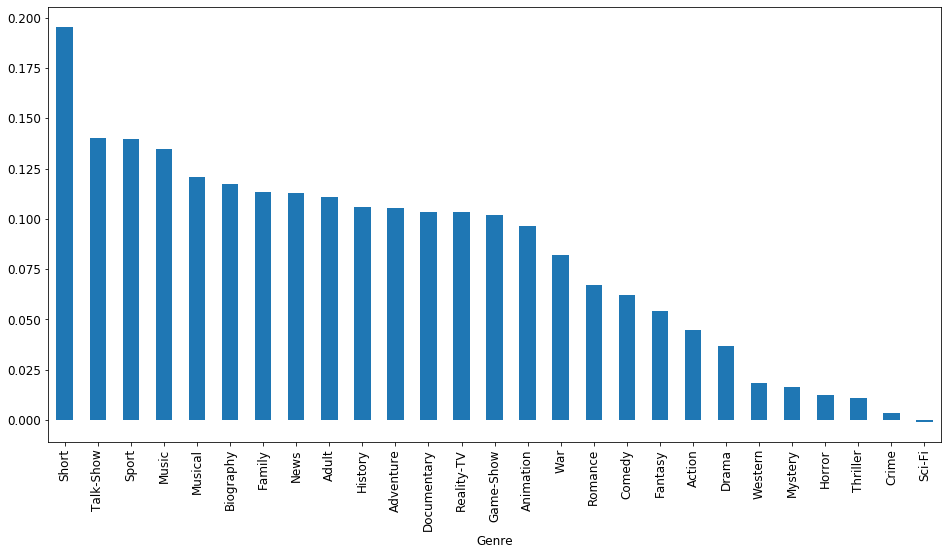

In [53]:
movie_counts_df = movies['Genre'].value_counts().to_frame()

movie_counts_df['Avg Polarity'] = None

movie_counts_df = movie_counts_df.reset_index()

movie_counts_df = movie_counts_df.rename(columns={'Genre':'Count', 'index':'Genre'})

for idx, movie in enumerate(movie_counts_df['Genre']):
    movie_counts_df.loc[idx,'Avg Polarity'] = movies[movies[movie] == 1]['polarity'].mean()

movie_counts_df = movie_counts_df.sort_values('Avg Polarity', ascending=False)
movie_counts_df.plot(x='Genre', y='Avg Polarity', kind='bar', legend=False, figsize= (16,8))

Films are generally more positive than not, but some genres have more positive sentiment than others.

Talk-Shows and Shorts generally have really positive plots while Crimes and Thrillers tend to have more negative plots.

# Word Clouds
Finally, we wil build word clouds for the frequency of each word. This is useful as people can quickly take a glance at a word cloud to see which words are the most popular for a given genre.

> NOTE: Word Clouds is actually a terrible tool for a Data Scientist. However, they are cool visualizations that allow you to gain a lot of information from a really quick glance. Additionally, buisness professionals like cool visualizations like these.

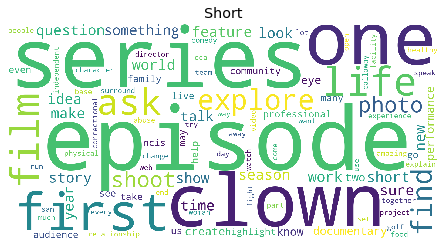

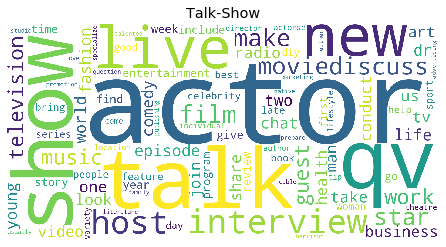

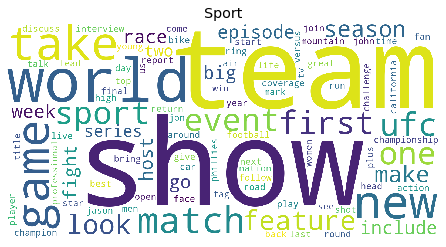

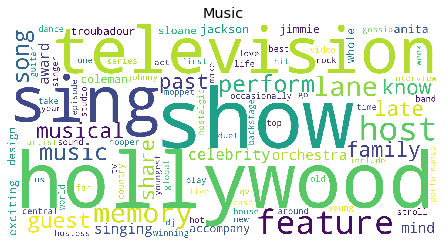

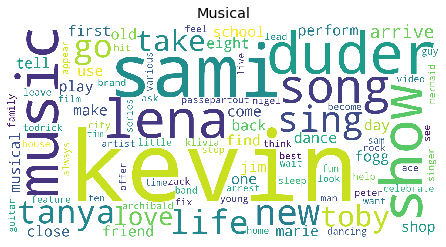

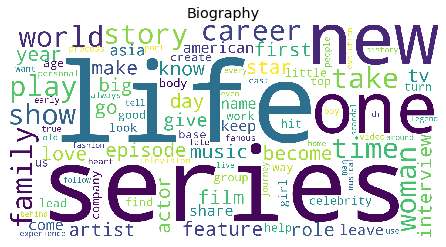

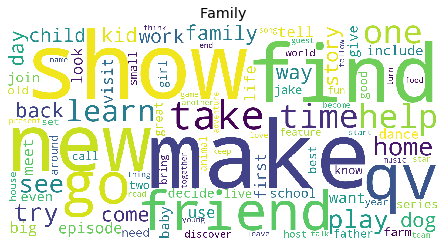

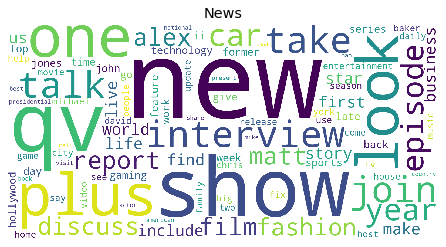

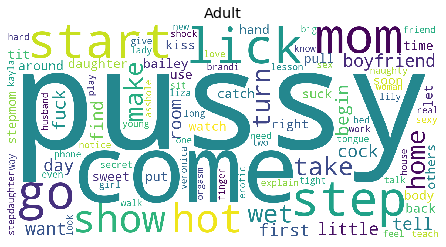

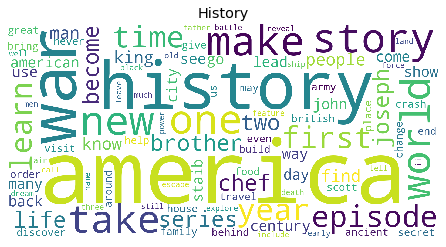

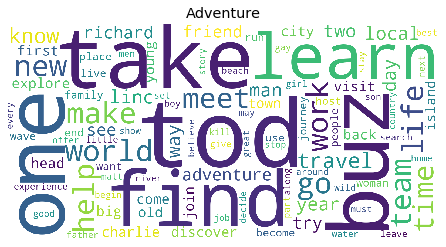

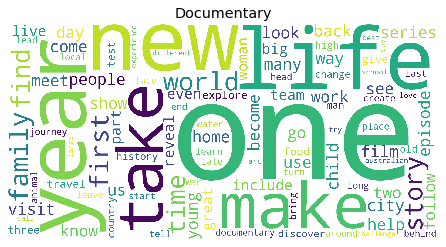

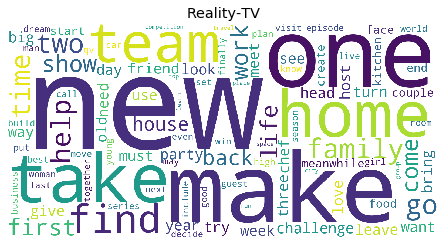

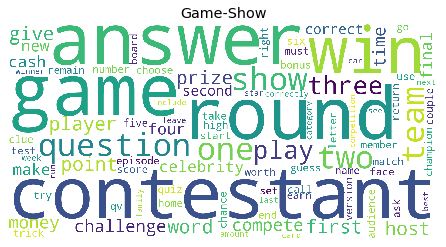

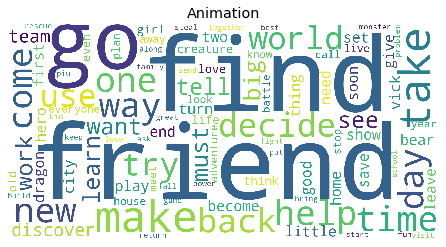

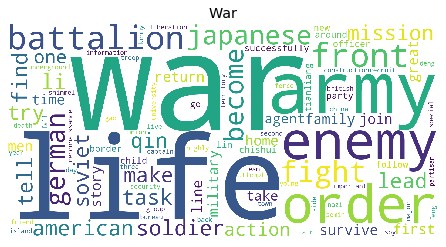

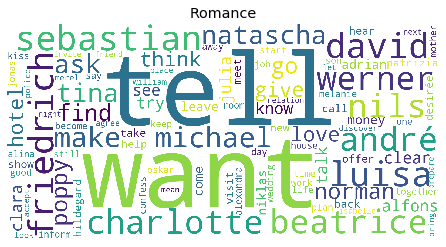

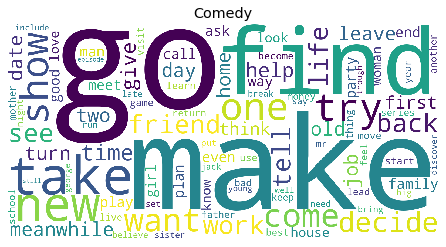

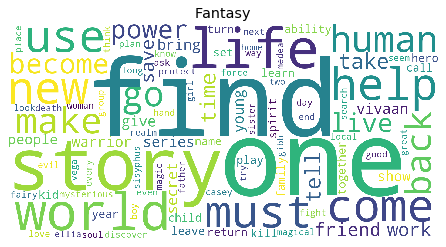

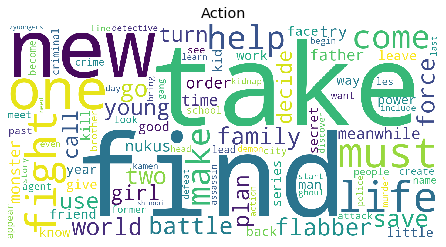

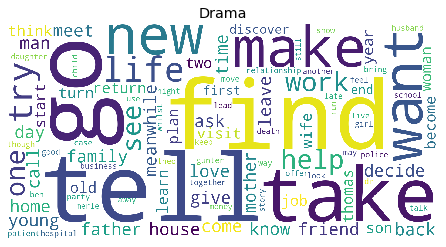

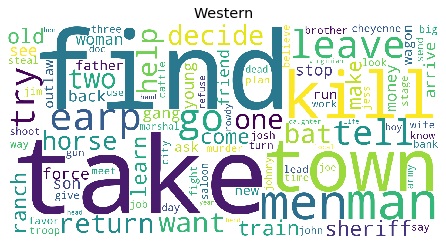

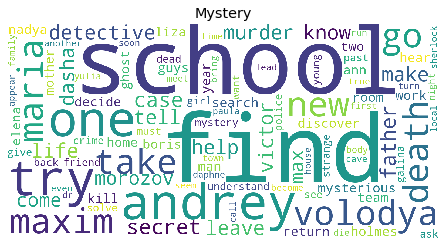

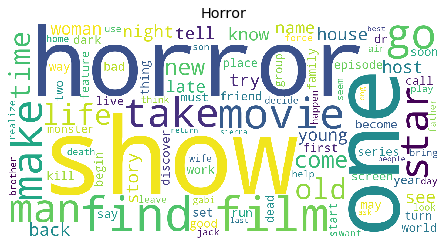

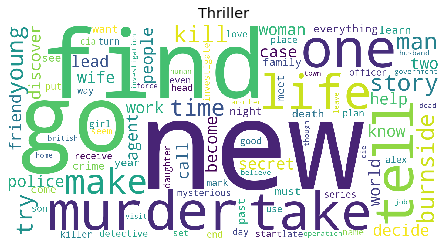

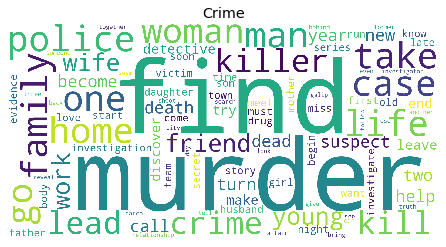

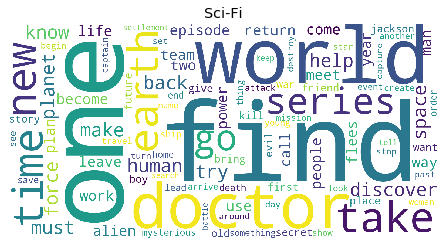

In [54]:
from wordcloud import WordCloud

for movie in movie_counts_df['Genre']:
    all_words = get_all_words(movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist())
    fdist = FreqDist(all_words)
    df = pd.DataFrame(fdist.most_common(100),columns=['Word','Count'])
    wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(df['Word'].to_string()) 
    plt.title(movie)
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show()

# Preparing data for Modeling
We will put labels to each dataset and split them into "training" and "testing". We will have half of each genre be used for training, and the other half be used for testing.

In [56]:
# Create a dictionary of data mapped to Genre
data_dict = {}
for movie in movies['Genre'].unique():

    clean_plot_list = []
    for plot_tokens in movies[movies[movie] == 1]['plot_tokens_cleaned'].tolist():
        clean_plot_list += [" ".join(plot_tokens)]
    
    # Map list of "Cleaned Tokens" and "Sentiment Polarity" to each Genre
    data_dict[movie] = (clean_plot_list, movies['polarity'].tolist())
    

# Split data set up.
train_data = []
test_data = []

train_sentiment = []
test_sentiment = []

Y_train = []
Y_test = []

# We will have the training set and the testing set be the same size.
for genre in data_dict:
    # Determine cut length for each genre
    cut = int(len(data_dict[genre][0])//2)
    end_cut = cut + cut

    train_data += data_dict[genre][0][:cut]
    test_data += data_dict[genre][0][cut:end_cut]
                                   
    train_sentiment += data_dict[genre][1][:cut]
    test_sentiment += data_dict[genre][1][cut:end_cut]
    
    # Grab the Training and Testing data
    Y_train += [genre] * len(data_dict[genre][1][:cut])
    Y_test += [genre] * len(data_dict[genre][1][cut:end_cut])

# Convert Targets to Series
Y_train = pd.Series(Y_train)
Y_test = pd.Series(Y_test)

print("Length of Training Set: ", len(train_data))
print("Length of Testing Set: ", len(test_data))

Length of Training Set:  23890
Length of Testing Set:  23890


# Vectorizing using TfidfVectorizer

`TFIDF` = `Term Frequency - Inverse Document Frequency`

This intends to reflect how imporant a word is to a document. As the word increases in frequency, the tf-idf value increases.

The reason we choose to use this is because "83% of text-based recommender systems in digital libraries use tf-idf" (https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
    
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
vectorizer.fit(train_data)

# Map indicies to word
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}

# Transform the Training and Testing data
X_train = vectorizer.transform(train_data).toarray()
X_test = vectorizer.transform(test_data).toarray()

# Convert To DataFrame
X_train = pd.DataFrame(X_train)
X_train = X_train.rename(columns = inv_map)
# Add sentiment score
X_train = pd.concat([X_train, pd.DataFrame(train_sentiment)], axis=1)
X_train = X_train.rename(columns={0:"Sentiment Score"})

# Convert To DataFrame
X_test = pd.DataFrame(X_test)
X_test = X_test.rename(columns = inv_map)
# Add sentiment score
X_test = pd.concat([X_test, pd.DataFrame(test_sentiment)], axis=1)
X_test = X_test.rename(columns={0:"Sentiment Score"})

# Create a generic form of this, to be used later.
def preprocess_plot(plot_str):
    """Pass in a plot and get out the vectorized form of it"""
    plot_str = remove_noise([plot_str])[0]
    
    # Get sentiment score
    polarity = TextBlob(plot_str).sentiment.polarity
    
    # Convert to vectorized form
    vector = vectorizer.transform([plot_str]).toarray()
    
    # Convert to DataFrame and rename columns
    data = pd.DataFrame(vector)
    
    data = data.rename(columns=inv_map)
    
    # Add sentiment score
    data = pd.concat([data, pd.DataFrame(pd.Series(polarity))], axis=1)
    data = data.rename(columns={0:"Sentiment Score"})
    
    return data

In [201]:
X_train.head()

000   10  10 000  10 year  100  100 000   11   12   13   14  14 year  \
0  0.0  0.0     0.0      0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0   
1  0.0  0.0     0.0      0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0   
2  0.0  0.0     0.0      0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0   
3  0.0  0.0     0.0      0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0   
4  0.0  0.0     0.0      0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0   

   14 year old   15  15 year   16   17   18   19  1950s  1960s  1966  1967  \
0          0.0  0.0      0.0  0.0  0.0  0.0  0.0    0.0    0.0   0.0   0.0   
1          0.0  0.0      0.0  0.0  0.0  0.0  0.0    0.0    0.0   0.0   0.0   
2          0.0  0.0      0.0  0.0  0.0  0.0  0.0    0.0    0.0   0.0   0.0   
3          0.0  0.0      0.0  0.0  0.0  0.0  0.0    0.0    0.0   0.0   0.0   
4          0.0  0.0      0.0  0.0  0.0  0.0  0.0    0.0    0.0   0.0   0.0   

   1983   20  20 year  200  2000  2005  2005 qv  2006  2007  2008  2009  2010  \
0   0.0  0.0      0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0  0.0      0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0  0.0      0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0  0.0      0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0  0.0      0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0   

   2011  2012  2013  2014  2014 qv  2015  2015 qv  2016  2016 qv  2017  20th  \
0   0.0   0.0   0.0   0.0      0.0   0.0      0.0   0.0      0.0   0.0   0.0   
1   0.0   0.0   0.0   0.0      0.0   0.0      0.0   0.0      0.0   0.0   0.0   
2   0.0   0.0   0.0   0.0      0.0   0.0      0.0   0.0      0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0      0.0   0.0      0.0   0.0      0.0   0.0   0.0   
4   0.0   0.0   0.0   0.0      0.0   0.0      0.0   0.0      0.0   0.0   0.0   

    21   22   23   24  24 hour   25   26   27   30  30 year  300   35   3d  \
0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0   

    40  400   50  50 000  500   60   70   80   90  _the  aaron  abandon  abby  \
0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0   0.0   
1  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0   0.0   
2  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0   0.0   
3  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0   0.0   
4  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0   0.0   

   abc  ability  able  aboard  aboriginal  abortion  abroad  absence  abuse  \
0  0.0      0.0   0.0     0.0         0.0       0.0     0.0      0.0    0.0   
1  0.0      0.0   0.0     0.0         0.0       0.0     0.0      0.0    0.0   
2  0.0      0.0   0.0     0.0         0.0       0.0     0.0      0.0    0.0   
3  0.0      0.0   0.0     0.0         0.0       0.0     0.0      0.0    0.0   
4  0.0      0.0   0.0     0.0         0.0       0.0     0.0      0.0    0.0   

   abusive  academy  accept  access  accessory  accident  accidentally  \
0      0.0      0.0     0.0     0.0        0.0       0.0           0.0   
1      0.0      0.0     0.0     0.0        0.0       0.0           0.0   
2      0.0      0.0     0.0     0.0        0.0       0.0           0.0   
3      0.0      0.0     0.0     0.0        0.0       0.0           0.0   
4      0.0      0.0     0.0     0.0        0.0       0.0           0.0   

   accompany  accompany memory  accompany memory lane  accomplish  accord  \
0        0.0               0.0                    0.0         0.0     0.0   
1        0.0               0.0                    0.0         0.0     0.0   
2       

In [203]:
Y_train.head()

0    Comedy
1    Comedy
2    Comedy
3    Comedy
4    Comedy
dtype: object

## Test preprocess_plot()
We will test our preprocess_plot() function

In [204]:
preprocess_plot("Hello, my name is Cameron. Also, my group members names are Andrew and Tou. We are excited about this project!")

000   10  10 000  10 year  100  100 000   11   12   13   14  14 year  \
0  0.0  0.0     0.0      0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0   

   14 year old   15  15 year   16   17   18   19  1950s  1960s  1966  1967  \
0          0.0  0.0      0.0  0.0  0.0  0.0  0.0    0.0    0.0   0.0   0.0   

   1983   20  20 year  200  2000  2005  2005 qv  2006  2007  2008  2009  2010  \
0   0.0  0.0      0.0  0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0   

   2011  2012  2013  2014  2014 qv  2015  2015 qv  2016  2016 qv  2017  20th  \
0   0.0   0.0   0.0   0.0      0.0   0.0      0.0   0.0      0.0   0.0   0.0   

    21   22   23   24  24 hour   25   26   27   30  30 year  300   35   3d  \
0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0  0.0      0.0  0.0  0.0  0.0   

    40  400   50  50 000  500   60   70   80   90  _the  aaron  abandon  abby  \
0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0      0.0   0.0   

   abc  ability  able  aboard  aboriginal  abortion  abroad  absence  abuse  \
0  0.0      0.0   0.0     0.0         0.0       0.0     0.0      0.0    0.0   

   abusive  academy  accept  access  accessory  accident  accidentally  \
0      0.0      0.0     0.0     0.0        0.0       0.0           0.0   

   accompany  accompany memory  accompany memory lane  accomplish  accord  \
0        0.0               0.0                    0.0         0.0     0.0   

   account  accuse  ace  achieve  acquire  across  across country  act  \
0      0.0     0.0  0.0      0.0      0.0     0.0             0.0  0.0   

   acting  action  active  activist  activity  actor  actors  \
0     0.0     0.0     0.0       0.0       0.0    0.0     0.0   

   actors entertainment  actors entertainment channel  actors podcast  \
0                   0.0                           0.0             0.0   

   actors podcast network  actorse  actorse chat  actorse chat co  \
0                     0.0      0.0           0.0              0.0   

   actorse chat live  actress  actual  actually   ad  adam  adams  adapt  add  \
0                0.0      0.0     0.0       0.0  0.0   0.0    0.0    0.0  0.0   

   addict  addiction  addition  additional  address  adjust  admire  admirer  \
0     0.0        0.0       0.0         0.0      0.0     0.0     0.0      0.0   

   admit  adopt  adoption  adrian  adult  advance  advantage  adventure  \
0    0.0    0.0       0.0     0.0    0.0      0.0        0.0        0.0   

   advertising  advice  advise  affair  affect  affection  afford  \
0          0.0     0.0     0.0     0.0     0.0        0.0     0.0   

   afghanistan  afraid  africa  african  aftermath  afternoon  afterwards  \
0          0.0     0.0     0.0      0.0        0.0        0.0         0.0   

   age  aged  agency  agenda  agent  aggressive  agnes  ago  agree  agreement  \
0  0.0   0.0     0.0     0.0    0.0         0.0    0.0  0.0    0.0        0.0   

   ahead  aid  aids  aim  air  air force  aircraft  airplane  airport  aka  \
0    0.0  0.0   0.0  0.0  0.0        0.0       0.0       0.0      0.0  0.0   

    al  alan  alarm  alaska  albert  album  alcohol  alcoholic  alec  alert  \
0  0.0   0.0    0.0     0.0     0.0    0.0      0.0        0.0   0.0    0.0   

   alex  alexander  alexandra  alf  alfie  ali  alice  alien  alike  alison  \
0   0.0        0.0        0.0  0.0    0.0  0.0    0.0    0.0    0.0     0.0   

   alive  all  allegedly  allen  alliance  allie  allison  allow  ally  \
0    0.0  0.0        0.0    0.0       0.0    0.0      0.0    0.0   0.0   

   almost  alone  along  along way  alongside  already      also  \
0     0.0    0.0    0.0        0.0        0.0      0.0  0.210929   

   also feature  also feature television  also get  also occasionally  \
0           0.0                      0.0       0.0                0.0   

   also occasionally feature  alter  alternative  although  always  amaar  \
0                        0.0    0.0          0.0       0.0     0.0    0.0   

   amanda  amateur  amaze  am

# Build Model

The function `test_model` is a generic function that accepts a model, parameters for that model, and data. This function will run the model, and generate an accuracy score and make a prediction.

In [205]:
from sklearn.metrics import accuracy_score

def test_model(model, params, model_name, X_train, y_train, X_test, Y_test):
    """Trains model, and evaluates it.
        PARAMS:
            model_choice - SKLearn Model: Model to be trained
            params - dictionary: Dictionary of parameters to feed the model
            X_train - DataFrame: Training Data, Features
            y_train - DataFrame: Training Data, Targets
            X_test - DataFrame: Testing Data, Features
            y_test - DataFrame: Testing Data, Targets
        
        RETURNS:
            Accuracy - float: Accuracy for specified model and parameters. 
    """
    print("Begin ", model_name)
    start = time.time()

    # Run model and get predictions and accuracy
    clf = model(**params)
    clf.fit(X_train, Y_train)
    
    predictions = clf.predict(X_test)
    
    accuracy = accuracy_score(Y_test, predictions)
    print(f"{model_name} Accuracy: ", accuracy)
    
    print("Time Elapsed: ", time.time() - start)
    
    return (accuracy, predictions, clf, model_name)

# Running different models
* KNeighborsClassifier
* Support Vector Machine
* XGBoost

We are running a variety of models to see which one might obtain the best performance.

In [ ]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

xgb_params = {'objective':'multi:softmax'}
knc_params = {}
svc_params = {'decision_function_shape':'ovo'}

models_to_test = [
    #(KNeighborsClassifier, knc_params, "KNeighbors"),
    (SVC, svc_params, "Support Vector Machine")
    #(xgb.XGBClassifier, xgb_params, "XGBoost")
]

results = []
for model in models_to_test:
        results += [test_model(model[0], model[1], model[2], X_train, Y_train, X_test, Y_test)]
        
# Sort results by the best accuracy.
results.sort(key = lambda x: x[0], reverse=True)

print(results)

Begin  Support Vector Machine


# Metrics of the best Classifier.
First we will see which model performed the best.

Next we will see some metrics within each class, and then metrics for the entire model. This is done using the handy `classification_report`.

Precision

* `True Postive / Actual Results`

Recall

* `True Postive / Predicted Results`

F1-Score

* The F1-Score is a Harmonic mean between the Precision and Recall. This can be calculated as follows:

    * `2 * (Precision * Recall) / (Precision + Recall)`

Support

* The number of samples in the True Positive.

Accuracy

* `(True Postive + True Negative) / Actual Results` 

In [166]:
# Grab best CLF
best_clf = results[0][2]
best_predictions = results[0][1]

print("The best classifier was: ", results[0][3], ". With a ", results[0][0], "% accuracy.")

The best classifier was:  Support Vector Machine . With a  0.5017999162829636 % accuracy.


In [164]:
from sklearn.metrics import classification_report

print("The best classifier was: ", results[0][3])

# Grab the best predictions
predictions = results[0][1]
print(classification_report(Y_test, predictions))

The best classifier was:  Support Vector Machine


C:\Users\chosb\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Action       0.00      0.00      0.00       100
       Adult       0.00      0.00      0.00        26
   Adventure       0.37      0.03      0.05       351
   Animation       0.54      0.21      0.30       828
   Biography       0.00      0.00      0.00        82
      Comedy       0.47      0.75      0.58      5461
       Crime       0.57      0.13      0.21       318
 Documentary       0.46      0.58      0.51      3045
       Drama       0.51      0.42      0.46      3727
      Family       0.30      0.04      0.06       803
     Fantasy       0.00      0.00      0.00        64
   Game-Show       0.88      0.28      0.42       209
     History       0.00      0.00      0.00       146
      Horror       0.00      0.00      0.00       131
       Music       0.65      0.57      0.61       370
     Musical       0.00      0.00      0.00        18
     Mystery       0.00      0.00      0.00       119
        News       0.43    

# New predictions 

In [198]:
# Make list of movies to predict for
custom_plot_lst = [
    # Documentary    
    ("Documentary", "This is a documentary movie."),
    
    # Tiger King
    ("Tiger King", "A rivalry between big cat eccentrics takes a dark turn when Joe Exotic, a controversial animal park boss, is caught in a murder-for-hire plot."),

    # Step Brothers
    ("Step Brothers", "Two aimless middle-aged losers still living at home are forced against their will to become roommates when their parents marry."),

    # Parks and Recs
    ("Parks and Recreation", "The absurd antics of an Indiana town's public officials as they pursue sundry projects to make their city a better place."),

    # Star Wars: The Rise of Skywalker
    ("Star Wars", "The surviving members of the resistance face the First Order once again, and the legendary conflict between the Jedi and the Sith reaches its peak bringing the Skywalker saga to its end."),
    
    # The Notebook
    ("The Notebook", "A poor yet passionate young man falls in love with a rich young woman, giving her a sense of freedom, but they are soon separated because of their social differences."),

    # Schindler's List
    ("Schindler's List", "In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.")
    
]

In [199]:
def make_single_prediction(plot_str, clf):
    """Pass in a String and model, and make a prediction on it."""
    data = preprocess_plot(plot_str)
    
    return clf.predict(data)[0]

for custom_plot in custom_plot_lst:
        print("Show: ", custom_plot[0], "\n\tPredicted Genre: ", make_single_prediction(custom_plot[1], best_clf))

Show:  Documentary 
	Predicted Genre:  Documentary
Show:  Tiger King 
	Predicted Genre:  Reality-TV
Show:  Step Brothers 
	Predicted Genre:  Comedy
Show:  Parks and Recreation 
	Predicted Genre:  Reality-TV
Show:  Star Wars 
	Predicted Genre:  Reality-TV
Show:  The Notebook 
	Predicted Genre:  Drama
Show:  Schindler's List 
	Predicted Genre:  Documentary
